<a href="https://colab.research.google.com/github/arjunpogaku/BOOK_Hands-on-Pattern-Mining/blob/main/chapter9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 9: Utility Databases - Representation, Creation, and Statistics

## Install the PAMI library

In [1]:
!pip install --upgrade pami

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 6.5 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3311 sha256=d75fe640445420ebf5fca11743e98d96aaa5256a6fc800322f4631e5728c41a5
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filenam

## Download the dataset

In [2]:
!wget -nc https://web-ext.u-aizu.ac.jp/~udayrage/datasets/utilityDatabases/Utility_T10I4D100K.csv

--2024-12-11 06:42:17--  https://web-ext.u-aizu.ac.jp/~udayrage/datasets/utilityDatabases/Utility_T10I4D100K.csv
Resolving web-ext.u-aizu.ac.jp (web-ext.u-aizu.ac.jp)... 163.143.103.34
Connecting to web-ext.u-aizu.ac.jp (web-ext.u-aizu.ac.jp)|163.143.103.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7356594 (7.0M) [text/csv]
Saving to: ‘Utility_T10I4D100K.csv’

Utility_T10I4D100K. 100%[===================>]   7.02M  15.9MB/s    in 0.4s    

2024-12-11 06:42:18 (15.9 MB/s) - ‘Utility_T10I4D100K.csv’ saved [7356594/7356594]



## Generic of Synthetic Utility Database

### Generic



```python

from PAMI.extras.syntheticDataGenerator  import UtilityDatabase as db
  
# Create a UtilityDatabase object with specified parameters
obj = db.UtilityDatabase(
        databaseSize=totalNumberOfTransactions,
        avgItemsPerTransaction=averageItemsPerTransaction,
        numItems=totalNumberOfItemsInDatabase,
        minInternalUtilityValue=minimumInternalUtilityAnItemCanHaveInDatabase,
        maxInternalUtilityValue=maximumInternalUtilityAnItemCanHaveInDatabase,
        minExternalUtilityValue=minimumExternalUtilityAnItemCanHaveInDatabase,
        maxExternalUtilityValue=maximumExternalUtilityAnItemCanHaveInDatabase,
        sep='\t'
        )

# Generate the synthetic utility database
obj.create()

# Save the generated database to a CSV file
obj.save('utilityDatabase.csv')

# Read the generated transactions into a dataframe
utilityDataFrame = obj.getTransactions()

# Display statistics about the generated database
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 1

In [15]:
from PAMI.extras.syntheticDataGenerator import utilityDatabase as db

# Create a UtilityDatabase object with specified parameters
obj = db.UtilityDataGenerator(
        databaseSize=100000,
        numberOfItems=1000,
        averageLengthOfTransaction=10,
        minimumInternalUtilityValue=1,
        maximumInternalUtilityValue=100,
        minimumExternalUtilityValue=100,
        maximumExternalUtilityValue=1000,
        # sep='\t'
        )

# Generate the synthetic utility database
obj.Generate()

# Save the generated database to a CSV file
obj.Save('utilityDatabase.csv')

# Read the generated transactions into a dataframe
utilityDataFrame = obj.GetUtilityData()

# Display statistics about the generated database
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

AttributeError: 'UtilityDataGenerator' object has no attribute 'getRuntime'

## Converting a DataFrame into a Utility Database

### Generic code



```python

from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np

#creating a 4 x 4 dataframe with random values
data = np.random.randint(1, 100, size=(4, 4))
dataFrame = pd.DataFrame(data_4x4,
             columns=['Item1', 'Item2', 'Item3', 'Item4']
            )
#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2UtilityDatabase(oFile='utilityDB.csv')
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))
```



### Example 2

In [16]:
from PAMI.extras.convert import DF2DB as alg
import pandas as pd
import numpy as np

#creating a 4 x 4 dataframe with random values
data = np.random.randint(1, 100, size=(4, 4))
dataFrame = pd.DataFrame(data,
             columns=['Item1', 'Item2', 'Item3', 'Item4']
            )
#converting the database into a transactional database by
#considering values greater than or equal to 36
obj = alg.DF2DB(dataFrame)
obj.convert2UtilityDatabase(oFile='utilityDB.csv')
print('Runtime: ' + str(obj.getRuntime()))
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Runtime: 0.02314925193786621
Memory (RSS): 2664681472
Memory (USS): 2642530304


In [17]:
!head utilityDB.csv

Item1	Item2	Item3	Item4:230:26	97	64	43
Item1	Item2	Item3	Item4:199:28	24	98	49
Item1	Item2	Item3	Item4:223:64	67	58	34
Item1	Item2	Item3	Item4:211:39	55	34	83


__Format of utility database:__ items:_totalUtility_:_itemsUtilityValues_

## Getting the Statistical Details of the Database

### Generic code



```python
from PAMI.extras.dbStats import UtilityDatabase as stat

obj = stat.UtilityDatabase("inputFileName")
obj.run()
obj.printStats()
obj.plotGraphs()
```



### Example 3

Database size : 99935
Number of items : 870
Minimum Transaction Size : 1
Average Transaction Size : 10.101836193525791
Maximum Transaction Size : 29
Minimum utility : 75
Average utility : 58042.54712643678
Maximum utility : 389886
Standard Deviation Transaction Size : 3.667097909135199
Variance : 13.447741640067324
Sparsity : 0.9883886940304302


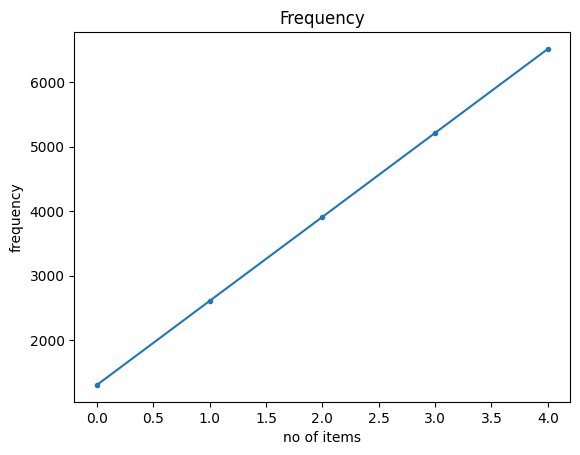

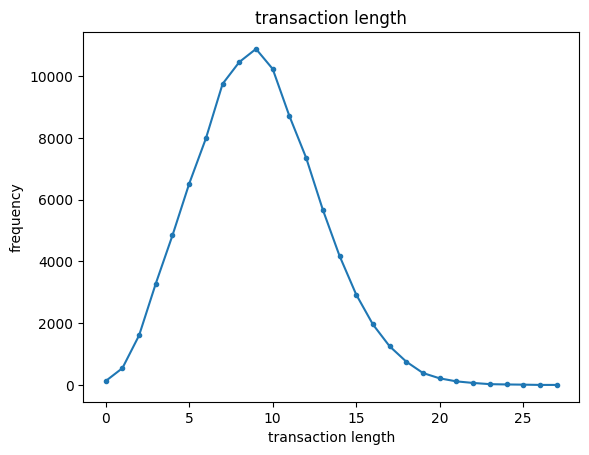

In [18]:
from PAMI.extras.dbStats import UtilityDatabase as stat

obj = stat.UtilityDatabase("Utility_T10I4D100K.csv")
obj.run()
obj.printStats()
obj.plotGraphs()